In [ ]:
import pandas as pd

df = pd.read_csv('C:/Users/Ayan/Downloads/imdb.csv')

df.head()

df.describe()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Movie     25 non-null     object 
 1   Duration  25 non-null     object 
 2   Year      25 non-null     int64  
 3   Rating    25 non-null     float64
 4   Reviews   25 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.1+ KB


In [6]:
def convert_duration(duration_str):
    time_parts = duration_str.split('h ')
    hours = int(time_parts[0])
    minutes = int(time_parts[1][:-1]) if len(time_parts) > 1 else 0
    return hours * 60 + minutes

df['Duration_minutes'] = df['Duration'].apply(convert_duration)

df.head()

,Movie,Duration,Year,Rating,Reviews,Duration_minutes
0,The Shawshank Redemption,2h 22m,1994,9.3,2.9,142
1,The Godfather,2h 55m,1972,9.2,2.1,175
2,The Dark Knight,2h 32m,2008,9.0,2.9,152
3,The Godfather: Part II,3h 22m,1974,9.0,1.4,202
4,12 Angry Men,1h 36m,1957,9.0,884.0,96


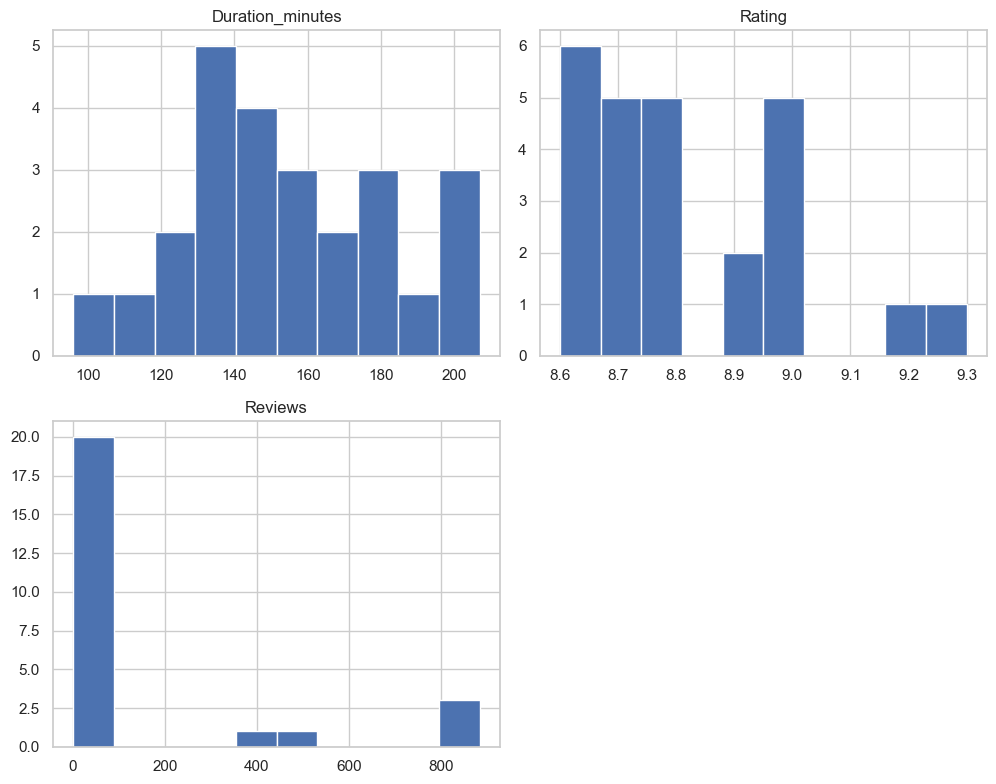

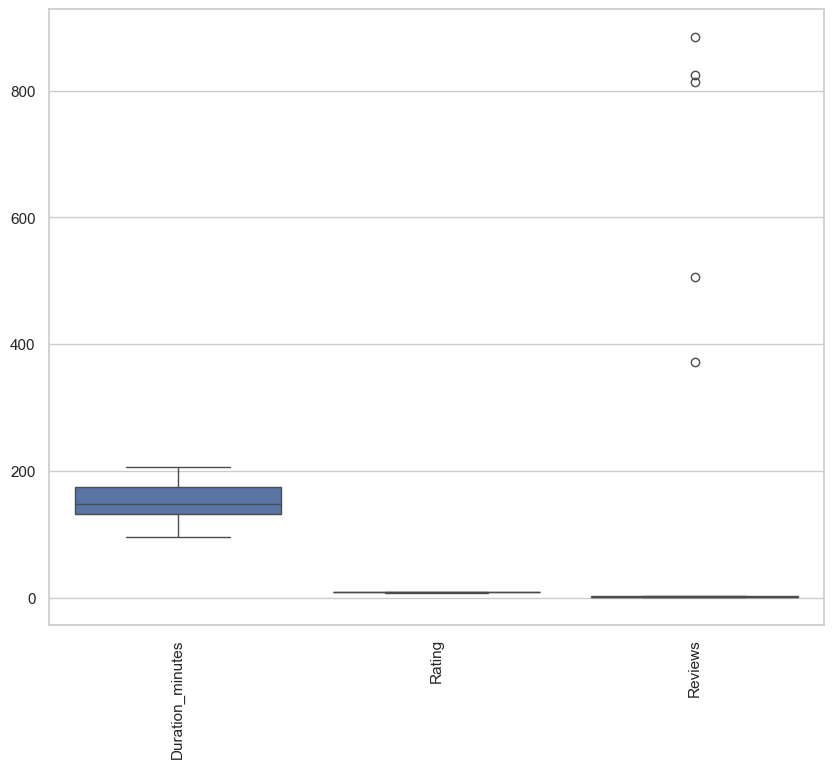

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

df[['Duration_minutes', 'Rating', 'Reviews']].hist(figsize=(10, 8), bins=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=df[['Duration_minutes', 'Rating', 'Reviews']])
plt.xticks(rotation=90)
plt.show()


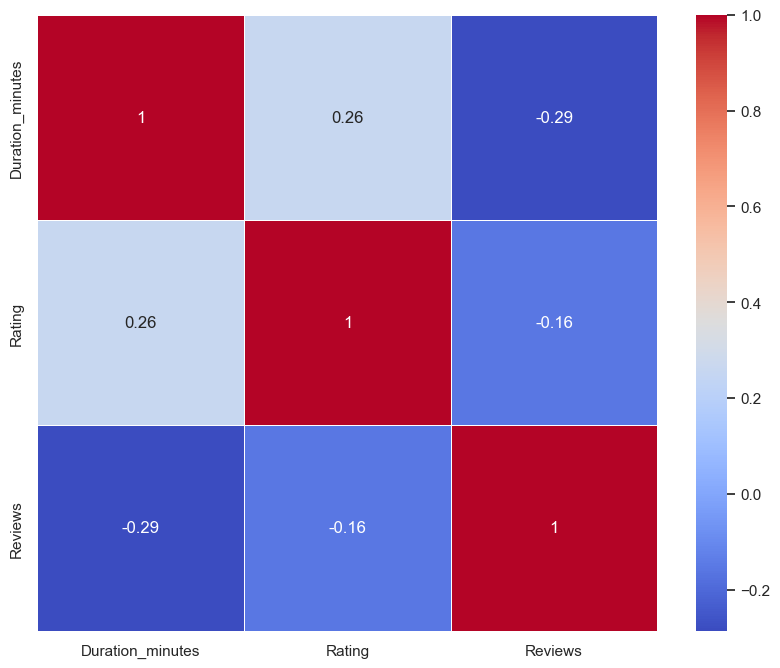

,Duration_minutes,Rating,Reviews
Duration_minutes,1.0,NaN,NaN
Rating,NaN,1.0,NaN
Reviews,NaN,NaN,1.0


In [8]:
correlation_matrix = df[['Duration_minutes', 'Rating', 'Reviews']].corr()

correlation_matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

strong_corr = correlation_matrix[abs(correlation_matrix) > 0.5]
strong_corr.dropna(how='all', axis=0).dropna(how='all', axis=1)